In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
d = pd.read_csv(r"C:\Users\Faiq Hilman\Downloads\train(1).csv")
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
x = d['GrLivArea']
y = d['SalePrice']
f = pd.concat([x,y], axis=1)
f.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


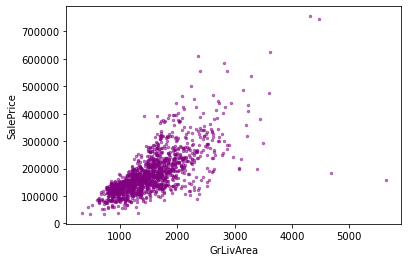

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s = 6, alpha = 0.5, color = "purple")
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

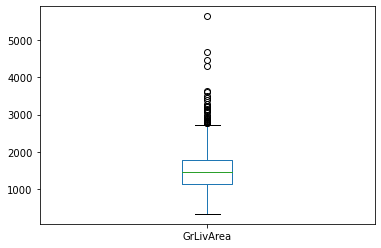

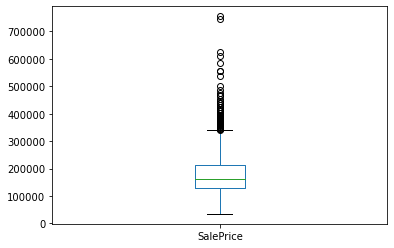

In [7]:
def plot_boxplot(d,ft):
    d.boxplot(column = [ft])
    plt.grid(False)
    plt.show()
    
plot_boxplot(d, 'GrLivArea')
plot_boxplot(d, 'SalePrice')

In [8]:
cols = ['GrLivArea','SalePrice'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = d[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = d[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((d[cols] < (Q1 - 1.5 * IQR)) | (d[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
clean_d = d[condition]
clean_d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


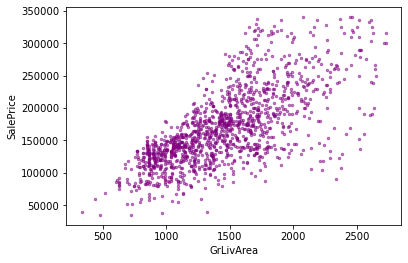

In [9]:
x = clean_d['GrLivArea']
y = clean_d['SalePrice']
plt.scatter(x, y, s = 6, alpha =0.5, color = "purple")
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


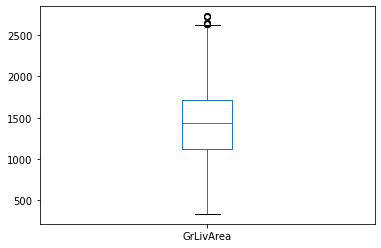

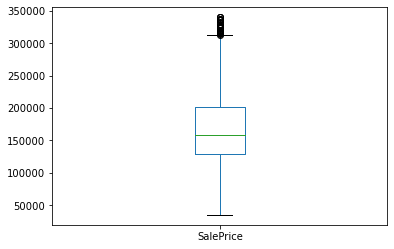

In [10]:
def plot_boxplot(clean_d,ft):
    clean_d.boxplot(column = [ft])
    plt.grid(False)
    plt.show()
    
plot_boxplot(clean_d, 'GrLivArea')
plot_boxplot(clean_d, 'SalePrice')

In [11]:
Train_X = d[['GrLivArea']]
Train_y = d[['SalePrice']]


# Split the data into training/testing sets
Train_X_train = Train_X[:-292]
Train_X_test = Train_X[-292:]

# Split the targets into training/testing sets
Train_y_train = Train_y[:-292]
Train_y_test = Train_y[-292:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Train_X_train, Train_y_train)

# Make predictions using the testing set
Train_y_pred = regr.predict(Train_X_test)


sns.regplot(x=Train_y_test,y=Train_y_pred,ci=None,color ='purple');


print(regr.score(Train_X_test,Train_y_test))

#plt.show()


NameError: name 'sns' is not defined

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Train_y_test, Train_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Train_y_test, Train_y_pred))



In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
d['residual']= Train_y_test - Train_y_pred
print("the residual's mean is ",np.mean(d['residual']))
numeric_features = d.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10


the residual's mean is  -5965.133071305958
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
residual        0.599630
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64 



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
d = pd.read_csv(r"C:\Users\Faiq Hilman\Downloads\train(1).csv")

In [15]:
x = d[['GrLivArea', 'GarageArea']]
y = d['SalePrice']

In [16]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [17]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -2314.8555477724294
Coefficients:


[('GrLivArea', 76.8849802851615), ('GarageArea', 140.32909251263746)]

In [10]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [138207.52826528 209213.24781235 150434.31993962 225517.74414024
 133880.36753056 202629.62128812 214608.63730036 255283.51219478
 116278.02741301 181858.27564757 203389.91073036 179317.3110701
 183818.48220012 174365.47022798 106394.74691327  85334.02197731
 177040.36372122  89793.35083385 126041.29962985 104528.54606225
 210894.47659893 120306.68835201 179938.23094944 196557.38826466
 194496.45433433 108219.02511593  23364.72786747 116690.37395505
 166953.87015643 158043.85317885 204185.7226442  165761.31275248
 258811.74130216  64498.19232003 130189.40871207 103348.38962185
 117200.08703674  98096.92870465 230823.84768441 122058.32156726
 240320.54309885 176011.25691784 240678.48565409 134024.93661594
 156017.40181563  72109.80536826 290878.53774324 159705.24092064
 131577.57835007  83030.83340689 227232.25483969 187165.74059576
 328764.03188352 227626.36038111 155304.9554337  241551.02428293
  59193.12868036 197646.57834214 180250.25198809 292370.1550826
 1

In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model

features = ['GrLivArea', 'GarageArea']
target = 'SalePrice'

X = d[features].values.reshape(-1, len(features))
y = d[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [20]:

model.intercept_

-6915.380673560663

In [21]:
model.coef_

array([ 80.67131781, 138.65724537])

In [22]:
model.score(X, y)

0.6107742041987958

In [23]:
print(X.shape)
print(y.shape)

(1460, 2)
(1460,)


In [24]:
x = d[['GrLivArea', 'GarageArea']]
y = d['SalePrice']

In [25]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [26]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_mlr= mlr.predict(x_test)

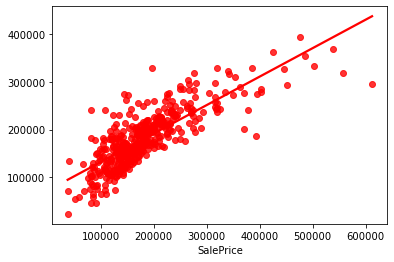

In [28]:
sns.regplot(x=y_test,y=y_pred_mlr,ci=None,color ='red');

In [29]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_mlr))

Coefficient of determination: 0.64


In [30]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_mlr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_mlr))



Mean squared error: 2295332992.38
Coefficient of determination: 0.64


In [31]:
# Exercise 2
df = pd.read_csv(r"C:\Users\Faiq Hilman\Downloads\censusCrimeClean(1).csv")
df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [32]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['ViolentCrimesPerPop'].sort_values(ascending=False)[:10], '\n') #top 10

ViolentCrimesPerPop    1.000000
PctIlleg               0.737957
racepctblack           0.631264
pctWPubAsst            0.574665
FemalePctDiv           0.556032
TotalPctDiv            0.552777
MalePctDivorce         0.525407
PctPopUnderPov         0.521877
PctUnemployed          0.504235
PctHousNoPhone         0.488243
Name: ViolentCrimesPerPop, dtype: float64 



0.5226827337267304


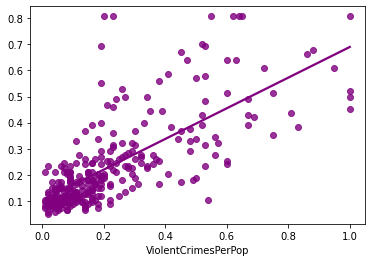

In [33]:
Train_X = df[['PctIlleg']]
Train_y = df[['ViolentCrimesPerPop']]


# Split the data into training/testing sets
Train_X_train = Train_X[:-292]
Train_X_test = Train_X[-292:]

# Split the targets into training/testing sets
Train_y_train = Train_y[:-292]
Train_y_test = Train_y[-292:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Train_X_train, Train_y_train)

# Make predictions using the testing set
Train_y_pred = regr.predict(Train_X_test)


sns.regplot(x=Train_y_test,y=Train_y_pred,ci=None,color ='purple');


print(regr.score(Train_X_test,Train_y_test))

In [34]:
x = df[['PctIlleg', 'racepctblack']]
y = df['ViolentCrimesPerPop']

In [35]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred_mlr= mlr.predict(x_test)

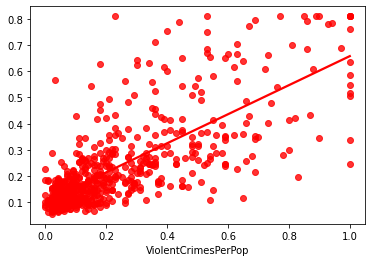

In [38]:
sns.regplot(x=y_test,y=y_pred_mlr,ci=None,color ='red');

In [48]:
import statsmodels.api as sm
import numpy as np
X = df[['PctIlleg', 'racepctblack']]
model = sm.OLS(df['ViolentCrimesPerPop'], X)
results = model.fit()
results.params

PctIlleg        0.826102
racepctblack    0.040392
dtype: float64

In [49]:
import statsmodels.api as sm
import numpy as np
X =  df[['PctIlleg', 'racepctblack']]
model = sm.OLS(df['ViolentCrimesPerPop'], X).fit()
summary = model.summary()
print(summary)

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.767
Model:                             OLS   Adj. R-squared (uncentered):              0.767
Method:                  Least Squares   F-statistic:                              3274.
Date:                 Wed, 16 Nov 2022   Prob (F-statistic):                        0.00
Time:                         20:45:57   Log-Likelihood:                          814.51
No. Observations:                 1994   AIC:                                     -1625.
Df Residuals:                     1992   BIC:                                     -1614.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------